<a href="https://colab.research.google.com/github/CheronoK/Sendy-Case-Study/blob/main/Sendy_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SENDY CASE STUDY

## 1. Defining the Question

### a.) Specifying the Data Analytic Question

This case study requires one to perform data analysis on data provided by Sendy in order to:

* Analyse the order cancellations and visualize the most
important aspects. 
* Recommend how to reduce the number of cancelled orders.
* Predict the cancellation reason for all orders with missing data in the second dataset.




### b.) Defining the Metric of Success

Our Metric of Success will be defined by:
* Analysis and creating visualizations of the data.
* The accuracy score for the predictive model to be built.

### c.) Understanding the Context

Sendy is the delivery partner for moving packages in Kenya. Sendy connects customers with drivers to help deliver goods from one place to another. It dispatches orders in real time to its available drivers and empowers them to make money by connecting them to delivery opportunities.

Sendy provides an app and web platform that enables (small) businesses to connect with drivers and request on demand or scheduled package delivery services anytime, any day, 24/7. 

Partnership is the foundation of what Sendy does. By partnering with Drivers and Businesses,  Sendy empowers individuals to grow their livelihood. Sendy does  this by building a platform that is  simple, transparent, and user Centric. Sendy’s goal is to be the preferred delivery partner in  Africa.

### d.) Recording the Experimental Design

The following are the steps taken to implement the solution :
* Define the question, the metric for success, the context, experimental design taken.
* Read and explore the given dataset.
* Define the appropriateness of the available data to answer the given question.
* Find and deal with outliers and missing data within the dataset.
* Perform Exploratory Data Analysis and record the observations.
* Build a prediction model for this study.
* Evaluating the model.
* Making predictions.
* Challenging the model.
* Giving recommendations on how to reduce the number of cancelled orders.
* Follow up questions.

### e.) Data Relevance

The data is relevant as it has been provided by Sendy Ltd.

## 2. Reading the Data

### a.) Importing Libraries

Importing the relevant python libraries to aid in this analysis. Some of the libraries will be imported later on.

In [ ]:
#Importing libraries for analysis and visualizations
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### b.) Loading the Dataset

Here, we load the three datasets from excel.

In [ ]:
#Loading the dataset

#Filepath
excel_path = "/content/Junior Data Analyst Data for Case Study.xlsx"

#The first dataset
df1 = pd.read_excel(excel_path, "Query result") # Query Result is the sheet name

#The second dataset
df2  = pd.read_excel(excel_path, 1) # 1 is the index of the second sheet

#Loading the Data description
Metadata  = pd.read_excel(excel_path, 2) # 2 is the index of the second sheet
Metadata.dropna(axis=1,how='any',thresh=None,subset=None,inplace=True)
new_header = Metadata.iloc[0] #grab the first row for the header
Metadata = Metadata[1:] #take the data less the header row
Metadata.columns = new_header #set the header row as the Metadata header

## 3. Checking the Data

In [ ]:
#Checking the data description
Metadata

,Column,Description
1,Personal or Business,Indicates if the order was placed by an indivi...
2,Business Number,The internal business number of the business t...
3,Vehicle Type,Vehicle that serviced the order e.g. Bike
4,Standard or Express,Type of order i.e Standard (We wait for multip...
5,Platform,"Platform that the order was placed e.g. iOS, a..."
6,Cancel Reason,Reason why the customer cancelled the order
7,Cancelled by,"Person who cancelled the order, either staff o..."
8,Placement Day,Day the order was placed i.e. 1 = Monday
9,Placement Time,Time the order was placed in 24 Hour Format
10,Confirmation Day,Day the order was confirmed i.e. 1 = Monday


The following is a description of the features of the datasets and general understanding of the datasets provided.

The two datasets have 17 features each which are described as follows:
* Personal or Business : This column indicates if the order was placed by an individual (Personal) or a business.
* Business Number : The internal business number of the business that placed the order.
* Vehicle Type : Vehicle that serviced the order i.e. Bike or Standard Bike.
* Standard or Express : Type of order i.e Standard (We wait for multiple orders and then dispatch them together) or Express (just one order at a time) 
* Platform : Platform that the order was placed.
* Cancel Reason : Reason why the customer cancelled the order.
* Cancelled by : Person who cancelled the order, either staff or customer.
* Placement Day : Day the order was placed i.e. 1 = Monday.
* Placement Time : Time the order was placed in 24 Hour Format
* Confirmation Day : Day the order was confirmed i.e. 1 = Monday.
* Confirmation Time : Time the order was confirmed in 24 Hour Format.
* Cancellation Day : Day the order was cancelled i.e. 1 = Monday.
* Cancellation Time : Time the order was cancelled in 24 Hour Format,
* Distance(KM) : Distance of the order from pick up to destination.
* Pickup Lat : Lattitude of the pick up location.
* Pickup Long : Longitude of the pick up location.
* scheduled : Indicates if the order was scheduled or ondemand.

In [ ]:
#Determining the number of records in the datasets
df1.shape
df2.shape

display('The main data has {} observations with {} features'.format(df1.shape[0], df1.shape[1]))
display('The data with missing cancel reason has {} observations with {} features'.format(df2.shape[0], df2.shape[1]))

'The main data has 6398 observations with 17 features'

'The data with missing cancel reason has 329 observations with 17 features'

In [ ]:
#Checking the top records of both datasets
print(df1.head())
print(df2.head())

  Personal or Business  Business Number  ... Pickup Long scheduled
0             Personal              NaN  ...   36.841437  OnDemAND
1             Personal              NaN  ...   36.853394  OnDemAND
2             Business          20680.0  ...   36.706867  OnDemAND
3             Personal              NaN  ...   36.778776  OnDemAND
4             Personal              NaN  ...   36.808166  OnDemAND

[5 rows x 17 columns]
  Personal or Business  Business Number  ... Pickup Long  scheduled
0             Personal              NaN  ...   36.822107   OnDemAND
1             Business          20680.0  ...   36.789303   OnDemAND
2             Business          17968.0  ...   36.961499   OnDemAND
3             Personal              NaN  ...   36.743936   OnDemAND
4             Personal              NaN  ...   36.920464  Scheduled

[5 rows x 17 columns]


In [ ]:
#Checking the bottom records of the dataset
print(df1.tail())
print(df2.tail())

     Personal or Business  Business Number  ... Pickup Long scheduled
6393             Personal              NaN  ...   36.767142  OnDemAND
6394             Personal              NaN  ...   36.799419  OnDemAND
6395             Personal              NaN  ...   36.733265  OnDemAND
6396             Personal              NaN  ...   36.825742  OnDemAND
6397             Personal              NaN  ...   36.747580  OnDemAND

[5 rows x 17 columns]
    Personal or Business  Business Number  ... Pickup Long  scheduled
324             Personal              NaN  ...   36.775842   OnDemAND
325             Personal              NaN  ...   36.770167  Scheduled
326             Personal              NaN  ...   36.911953   OnDemAND
327             Personal              NaN  ...   36.849949   OnDemAND
328             Personal              NaN  ...   36.790044   OnDemAND

[5 rows x 17 columns]


In [ ]:
#Checking the columns in the datasets
print("The columns for the main dataset are : ", df1.columns)
print("\n")
print("The columns for the other dataset are : ", df2.columns)

The columns for the main dataset are :  Index(['Personal or Business', 'Business Number', 'Vehicle Type',
       'Standard or Express', 'Platform', 'Cancel Reason', 'Cancelled by',
       'Placement Day', 'Placement Time', 'Confirmation Day',
       'Confirmation Time', 'Cancellation Day', 'Cancellation Time',
       'Distance (KM)', 'Pickup Lat', 'Pickup Long', 'scheduled'],
      dtype='object')


The columns for the other dataset are :  Index(['Personal or Business', 'Business Number', 'Vehicle Type',
       'Standard or Express', 'Platform', 'Cancel Reason', 'Cancelled by',
       'Placement Day', 'Placement Time', 'Confirmation Day',
       'Confirmation Time', 'Cancellation Day', 'Cancellation Time',
       'Distance (KM)', 'Pickup Lat', 'Pickup Long', 'scheduled'],
      dtype='object')


In [ ]:
#Checking for null values in the datasets
print(df1.isnull().any())
print("\n")
print(df2.isnull().any())

Personal or Business    False
Business Number          True
Vehicle Type            False
Standard or Express      True
Platform                False
Cancel Reason           False
Cancelled by            False
Placement Day           False
Placement Time          False
Confirmation Day         True
Confirmation Time        True
Cancellation Day        False
Cancellation Time       False
Distance (KM)           False
Pickup Lat              False
Pickup Long             False
scheduled               False
dtype: bool


Personal or Business    False
Business Number          True
Vehicle Type            False
Standard or Express     False
Platform                False
Cancel Reason            True
Cancelled by            False
Placement Day           False
Placement Time          False
Confirmation Day         True
Confirmation Time        True
Cancellation Day        False
Cancellation Time       False
Distance (KM)           False
Pickup Lat              False
Pickup Long             Fa

In [ ]:
#Checking the number of missing values in each column of both datasets
print(df1.isnull().sum())
print("\n")
print(df2.isnull().sum())

Personal or Business       0
Business Number         3334
Vehicle Type               0
Standard or Express        5
Platform                   0
Cancel Reason              0
Cancelled by               0
Placement Day              0
Placement Time             0
Confirmation Day        3516
Confirmation Time       3516
Cancellation Day           0
Cancellation Time          0
Distance (KM)              0
Pickup Lat                 0
Pickup Long                0
scheduled                  0
dtype: int64


Personal or Business      0
Business Number         169
Vehicle Type              0
Standard or Express       0
Platform                  0
Cancel Reason           329
Cancelled by              0
Placement Day             0
Placement Time            0
Confirmation Day        223
Confirmation Time       223
Cancellation Day          0
Cancellation Time         0
Distance (KM)             0
Pickup Lat                0
Pickup Long               0
scheduled                 0
dtype: int64


In [ ]:
#Checking for duplicated rows in each dataset
print(df1[df1.duplicated()].shape)
print("\n")
print(df2[df2.duplicated()].shape)

(0, 17)


(0, 17)


In [ ]:
#Checking the data types in each column of the datasets
print(df1.dtypes)
print("\n")
print(df2.dtypes)

Personal or Business     object
Business Number         float64
Vehicle Type             object
Standard or Express      object
Platform                 object
Cancel Reason            object
Cancelled by             object
Placement Day             int64
Placement Time           object
Confirmation Day        float64
Confirmation Time        object
Cancellation Day          int64
Cancellation Time        object
Distance (KM)             int64
Pickup Lat              float64
Pickup Long             float64
scheduled                object
dtype: object


Personal or Business     object
Business Number         float64
Vehicle Type             object
Standard or Express      object
Platform                 object
Cancel Reason           float64
Cancelled by             object
Placement Day             int64
Placement Time           object
Confirmation Day        float64
Confirmation Time        object
Cancellation Day          int64
Cancellation Time        object
Distance (KM)           

In [ ]:
#Obtaining more information of the datasets
print(df1.info())
print("\n")
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6398 entries, 0 to 6397
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Personal or Business  6398 non-null   object 
 1   Business Number       3064 non-null   float64
 2   Vehicle Type          6398 non-null   object 
 3   Standard or Express   6393 non-null   object 
 4   Platform              6398 non-null   object 
 5   Cancel Reason         6398 non-null   object 
 6   Cancelled by          6398 non-null   object 
 7   Placement Day         6398 non-null   int64  
 8   Placement Time        6398 non-null   object 
 9   Confirmation Day      2882 non-null   float64
 10  Confirmation Time     2882 non-null   object 
 11  Cancellation Day      6398 non-null   int64  
 12  Cancellation Time     6398 non-null   object 
 13  Distance (KM)         6398 non-null   int64  
 14  Pickup Lat            6398 non-null   float64
 15  Pickup Long          

In [ ]:
#Checking for unique values in the dataset
print(df1.nunique())
print("\n")
print(df2.nunique())

Personal or Business       2
Business Number          220
Vehicle Type               2
Standard or Express        2
Platform                   5
Cancel Reason              7
Cancelled by               2
Placement Day              7
Placement Time          5951
Confirmation Day           7
Confirmation Time       2681
Cancellation Day           7
Cancellation Time       5638
Distance (KM)            111
Pickup Lat              5639
Pickup Long             5657
scheduled                  2
dtype: int64


Personal or Business      2
Business Number          34
Vehicle Type              2
Standard or Express       2
Platform                  4
Cancel Reason             0
Cancelled by              2
Placement Day             5
Placement Time          322
Confirmation Day          5
Confirmation Time        96
Cancellation Day          6
Cancellation Time       274
Distance (KM)            38
Pickup Lat              319
Pickup Long             320
scheduled                 2
dtype: int64


In [ ]:
#Checking the unique values
print(df1['Personal or Business'].unique())
print(df1['Vehicle Type'].unique())
print(df1['Standard or Express'].unique())
print(df1['Platform'].unique())
print(df1['Cancel Reason'].unique())
print(df1['Cancelled by'].unique())
print(df1['Placement Day'].unique())
print(df1['Cancellation Day'].unique())
print(df1['scheduled'].unique())

['Personal' 'Business']
['Bike' 'Standard Bike']
['Express' 'Standard' nan]
['android' 'ios' 'desktop' 'API' 'peer_web']
['No driver has been allocated to my request.' 'My order is not ready.'
 'I placed the wrong locations.' 'No Partner' 'Customer error'
 'The driver is too far away.' 'Delay']
['Customer' 'Staff']
[1 2 3 4 5 6 7]
[1 2 3 5 4 7 6]
['OnDemAND' 'Scheduled']


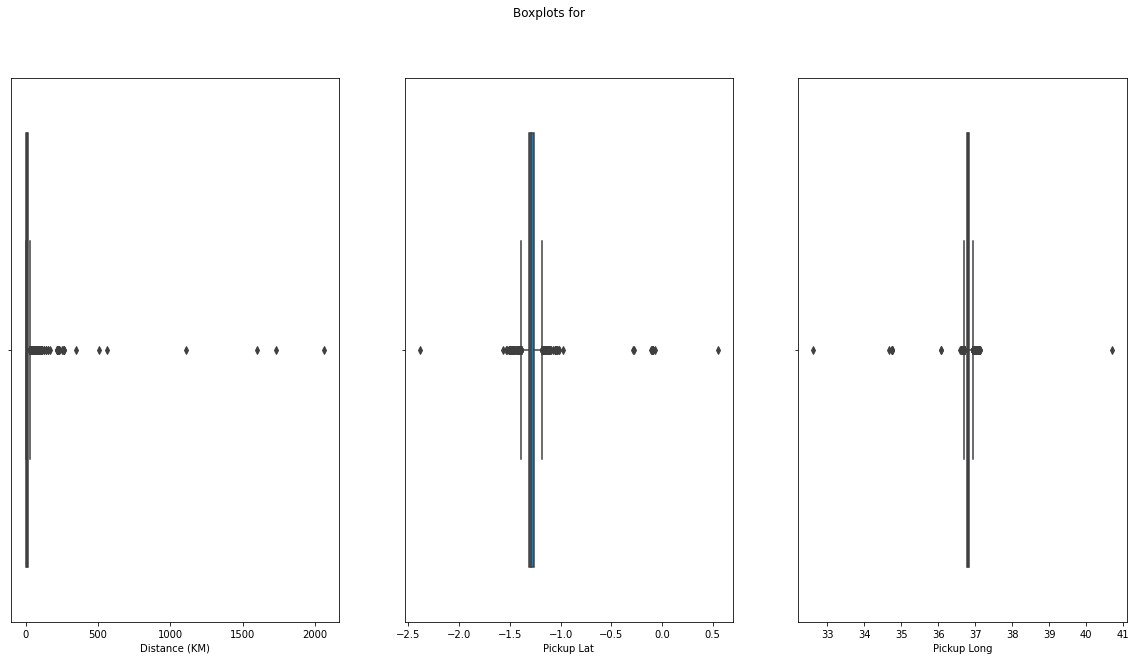

In [ ]:
#Checking for outliers
#Plotting boxplots to visualize outliers in the dataset

#Plotting for the first 11 variables
fig, ((ax1, ax2, ax3)) = plt.subplots(1,3, figsize=(20, 10))
fig.suptitle('Boxplots for ')
sns.boxplot(df1['Distance (KM)'], ax=ax1)
sns.boxplot(df1['Pickup Lat'], ax=ax2)
sns.boxplot(df1['Pickup Long'], ax=ax3)
plt.show()

The following are observations made from the datasets:
* The main dataset has 6,398 rows and 17 columns while the dataset with missing cancel reason column has 329 observations with 17 columns.
* Both datasets have missing values. Three columns have a lot of missing values i.e.Business Number, Confirmation Day and Confirmation Time. The Standard or Express column has only 5 missing values in the main dataset. The second dataset also has missing vales in the Cancel Reason column.
* Both datasets do not have any duplicated entries.
* The data types of each column include object, integer and float datatypes. However the datatype on Placement Day, Confirmation Day and Cancellation Day are integer, float and integer respectively. This is wrong as these are categorical columns. 
* Most of the columns have few unique values implying that they are categorical columns. These columns are as listed below:

  > * Personal or Business: This column has two unique vales i.e. Personal and Business.
  * Vehicle Type: This column has 2 unique values i.e. Bike and Standard Bike.
  * Standard  or Express: This column has 2 unique values i.e. Express and Standard.
  * Platform : This columns has 5 unique values i.e. android, ios, desktop, API and peer_web.
  * Cancel Reason : This column has 7 unique values implying there are 7 reasons a customer cancelled i.e. No driver has been allocated to my request, My order is not ready, I placed the wrong locations, No Partner, Customer error, The driver is too far away and Delay.
  * Cancelled by : This column has 2 unique vales implying only 2 people could cancel the order i.e. Customer or Staff.
  * Placement Day : There are only 7 days of the week i.e. 1 = Monday
  * Cancellation Day : There are only 7 days of the week i.e. 1 = Monday
  * scheduled : There are 2 unique values in this column i.e onDemand and scheduled
  * However, the Placement Day, Confirmation Day and Cancellation Day in the second dataset with missing cancel reason have 5, 5 and 6 unique values respectively. Implying that not all days of  the week are present.

* The three numerical columns i.e. Distance(km), pickup lat and pickup long have outliers. These will not be removed as they are necessary, they present the information of the orders hence removing them would results in removing actual information about orders.


## 4. External Dataset Validation

The datasets are provided by Sendy Ltd hence could not be externally validated.

## 5. Tidying the Dataset

The datasets contain noise and therefore require cleaning before analysis and modelling as data with noise can significantly impact results during analysis and prediction. 

The following steps will be carried out in order to obtain a clean dataset before analysis and prediction:
* Dealing with missing values: The Business number, Confirmation Day and Confirmation Time columns will be dropped as they contain a huge amount of null values. The remaining null vales i.e. 5 entries in the Standard or Express column will be dropped as they are few and will not have a huge impact when removed.
* Uniformity: Spaces from column names will be removed and changed to lowercase in order to make it easier when coding.
* Feature Engineering: The hour from the Placement and Cancelletion time columns will be extracted.
* Data types: The data types in the Placement Day, Confirmation Day and Cancellation Day and Cancel reason will be changed to object as they are categorical. In addition, the newly acquired hours from the Placement time and Cancellation time will be changed to categorical as well.

### a.) Null Values

In [ ]:
#Dropping the Business Number, Confirmation Day and Confirmation Time columns as they have a lot of null values.
df1.drop(['Business Number', 'Confirmation Day','Confirmation Time'], axis=1, inplace=True)
df2.drop(['Business Number', 'Confirmation Day','Confirmation Time'], axis=1, inplace=True)

In [ ]:
#Dropping the remaining null values in the main dataset
df1 = df1.dropna()

#Checking whether the missing values in each column of both datasets have been removed
print(df1.isnull().sum())
print("\n")
print(df2.isnull().sum())

Personal or Business    0
Vehicle Type            0
Standard or Express     0
Platform                0
Cancel Reason           0
Cancelled by            0
Placement Day           0
Placement Time          0
Cancellation Day        0
Cancellation Time       0
Distance (KM)           0
Pickup Lat              0
Pickup Long             0
scheduled               0
dtype: int64


Personal or Business      0
Vehicle Type              0
Standard or Express       0
Platform                  0
Cancel Reason           329
Cancelled by              0
Placement Day             0
Placement Time            0
Cancellation Day          0
Cancellation Time         0
Distance (KM)             0
Pickup Lat                0
Pickup Long               0
scheduled                 0
dtype: int64


### b.) Uniformity

In [ ]:
#Removing spaces from the column names and replacing it with an underscore and also removing fullstops
df1.columns = df1.columns.str.replace(" ", "_")

#Changing the names of the columns to lowercase
df1.columns = map(str.lower, df1.columns)

#Doing the same for the other dataset with missing cancel reason
df2.columns = df2.columns.str.replace(" ", "_")
df2.columns = map(str.lower, df2.columns)
#Checking the columns in the datasets
print("The columns for the main dataset are : ", df1.columns)
print("\n")
print("The columns for the other dataset are : ", df2.columns)

The columns for the main dataset are :  Index(['personal_or_business', 'vehicle_type', 'standard_or_express',
       'platform', 'cancel_reason', 'cancelled_by', 'placement_day',
       'placement_time', 'cancellation_day', 'cancellation_time',
       'distance_(km)', 'pickup_lat', 'pickup_long', 'scheduled'],
      dtype='object')


The columns for the other dataset are :  Index(['personal_or_business', 'vehicle_type', 'standard_or_express',
       'platform', 'cancel_reason', 'cancelled_by', 'placement_day',
       'placement_time', 'cancellation_day', 'cancellation_time',
       'distance_(km)', 'pickup_lat', 'pickup_long', 'scheduled'],
      dtype='object')


### c.) Feature Engineering and Data types

In [ ]:
#Changing the time columns to datetime data type and then extracting the hour from placement time and cancellation time on both datasets
df1['placement_time'] = pd.to_datetime(df1['placement_time'], format='%H:%M:%S').dt.hour
df1['cancellation_time'] = pd.to_datetime(df1['cancellation_time'], format='%H:%M:%S').dt.hour

df2['placement_time'] = pd.to_datetime(df2['placement_time'], format='%H:%M:%S').dt.hour
df2['cancellation_time'] = pd.to_datetime(df2['cancellation_time'], format='%H:%M:%S').dt.hour

In [ ]:
#Changing the data types to appropriate data types
df1['placement_day'] = df1['placement_day'].astype('object')
df1['cancellation_day'] = df1['cancellation_day'].astype('object')
df1['placement_time'] = df1['placement_time'].astype('object')
df1['cancellation_time'] = df1['cancellation_time'].astype('object')

#Doing the same for the other dataset
df2['placement_day'] = df2['placement_day'].astype('object')
df2['cancellation_day'] = df2['cancellation_day'].astype('object')
df2['cancel_reason'] = df2['cancel_reason'].astype('object')
df2['placement_time'] = df2['placement_time'].astype('object')
df2['cancellation_time'] = df2['cancellation_time'].astype('object')

In [ ]:
#Checking the general information of the clean datasets
print(df1.info())
print("\n")
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6393 entries, 0 to 6397
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   personal_or_business  6393 non-null   object 
 1   vehicle_type          6393 non-null   object 
 2   standard_or_express   6393 non-null   object 
 3   platform              6393 non-null   object 
 4   cancel_reason         6393 non-null   object 
 5   cancelled_by          6393 non-null   object 
 6   placement_day         6393 non-null   object 
 7   placement_time        6393 non-null   object 
 8   cancellation_day      6393 non-null   object 
 9   cancellation_time     6393 non-null   object 
 10  distance_(km)         6393 non-null   int64  
 11  pickup_lat            6393 non-null   float64
 12  pickup_long           6393 non-null   float64
 13  scheduled             6393 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 749.2+ KB
None


<clas

The final datasets have 14 columns each. The main dataset has 6393 entries and the other dataset with missing cancel reason has 329 entries.

The datasets are now clean and ready for analysis and predictions.

## 6. Exploratory Data Analysis


This section entails answers for the first question which requires one to analyse the order cancellations using the dataset and visualize the most important aspects.

The following steps were performed in order to analyse the order cancellations:
* Univariate Analysis
* Bivariate Analysis

### a.) Univariate Analysis

We'll perform analysis of single features using statistical descriptions, histograms, countplots, frequency tables and pie charts.

This analysis will purely be of individual variables.

#### i.) Statistical Description
This will show the measures of central tendency of the numerical variables i.e. the mean, mode and median. It will also show some measures of dispersion i.e. the standard deviation and the qartiles.

In [ ]:
#Checking statistical descriptions of the numerical features in the dataset
df1.describe()

,distance_(km),pickup_lat,pickup_long
count,6393.000000,6393.000000,6393.000000
mean,13.930862,-1.287768,36.814969
std,45.310560,0.067094,0.113884
min,0.000000,-2.390920,32.628902
25%,5.000000,-1.315811,36.786055
50%,9.000000,-1.291188,36.813105
75%,16.000000,-1.263937,36.843238
max,2061.000000,0.551064,40.689788


The table above shows the measures of central tendency of the numerical features i.e. distance in km, pickup latitude and pickup longitude.

The mean of the latitude is negative implying that the latitude has a lot of negative values. 

The maximum distance of the order from pick up to destination is 2061km while the least distance is 0km. The mean is 13.93km.

#### ii.) Histograms
 This will represent the distribution of numerical data in the dataset.

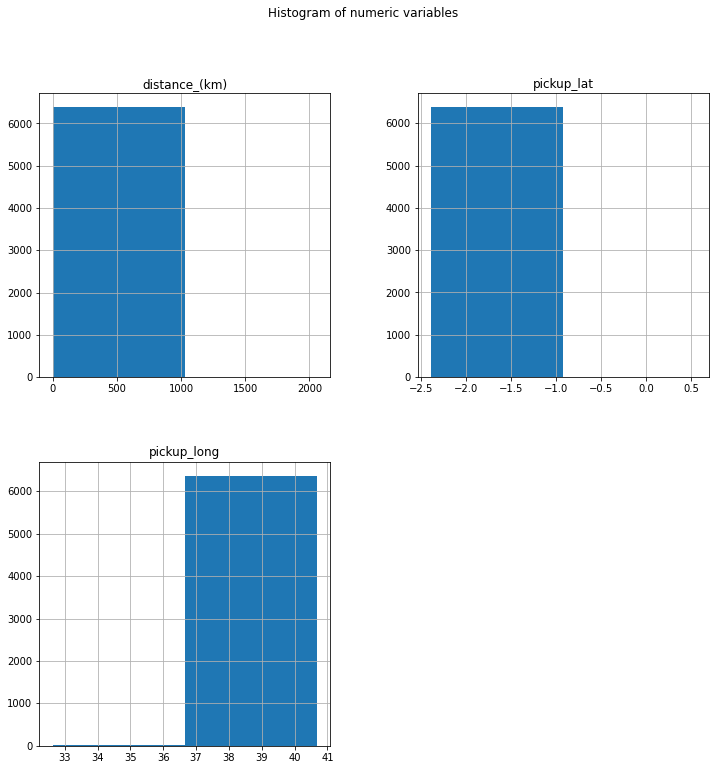

In [ ]:
#Plotting the numerical variables on histograms to view their distributions.
df1.hist(bins=2, figsize=(12,12))
plt.suptitle("Histogram of numeric variables")
plt.savefig('.... Histogram')
plt.show()

The histograms above follows a very uniform pattern as every bar is almost exactly the same height. This indicates the data is very consistent; the frequency of the classes in each numerical variable is very similar to that of the others. 

#### iii.) Countplots
The countplots will show the counts of observations in each categorical bin using bars.

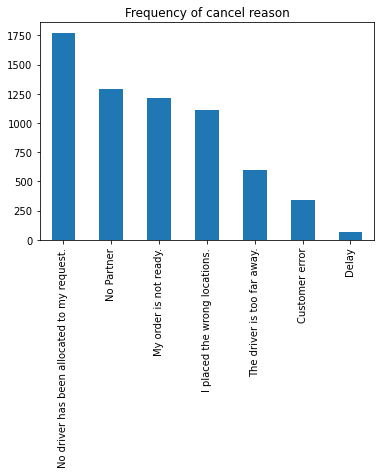

In [ ]:
#Plotting the barplot of the cancel reasons
df1['cancel_reason'].value_counts().plot.bar(title='Frequency of cancel reason')

The most popular reason as to why orders were cancelled is because there was 'no driver allocated to my request'

The second was 'No partner' followed by 'My driver is not ready', then 'I placed the wrong location', then 'The driver is too far away' and 'Customer error'

The least popular reason as to why an order was canceled is 'Delay'

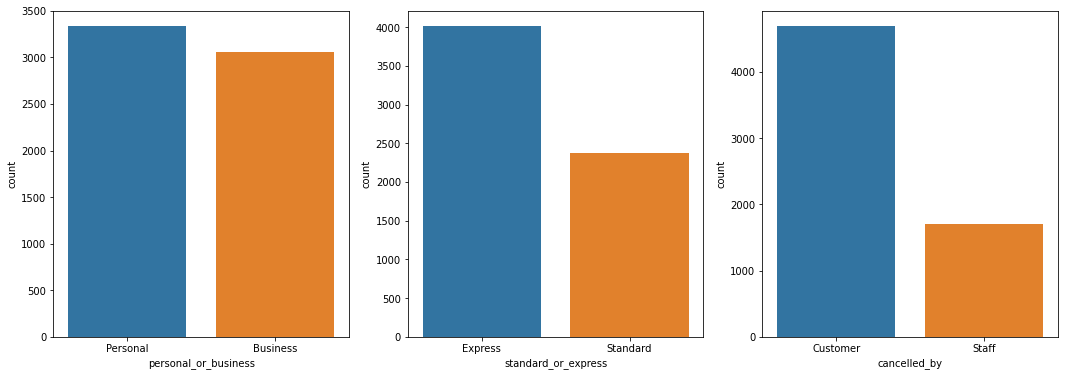

In [ ]:
#Ploting the count of personal or business, standard or express and cancelled by
fig, ax = plt.subplots(1,3, figsize=(18, 6))
sns.countplot(df1['personal_or_business'], ax=ax[0])
sns.countplot(df1['standard_or_express'], ax=ax[1])
sns.countplot(df1['cancelled_by'], ax=ax[2])

Most cancelled orders were personal.

Most cancelled orders were Express i.e. the orders sent one at a time.

Most orders were cancelled by the customer.

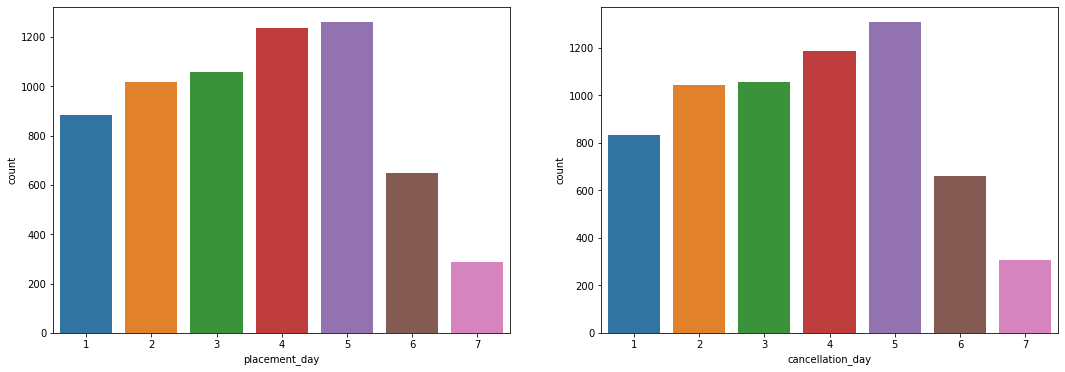

In [ ]:
#Plotting the count of the cancellation day and placement day
fig, ax = plt.subplots(1,2, figsize=(18, 6))
sns.countplot(df1['placement_day'], ax=ax[0])
sns.countplot(df1['cancellation_day'], ax=ax[1])

Most cancelled orders were placed on Friday with Sunday having the least amount of orders placed.

Most cancelled orders were cancelled on Friday with Sunday being the day with the least cancellations.

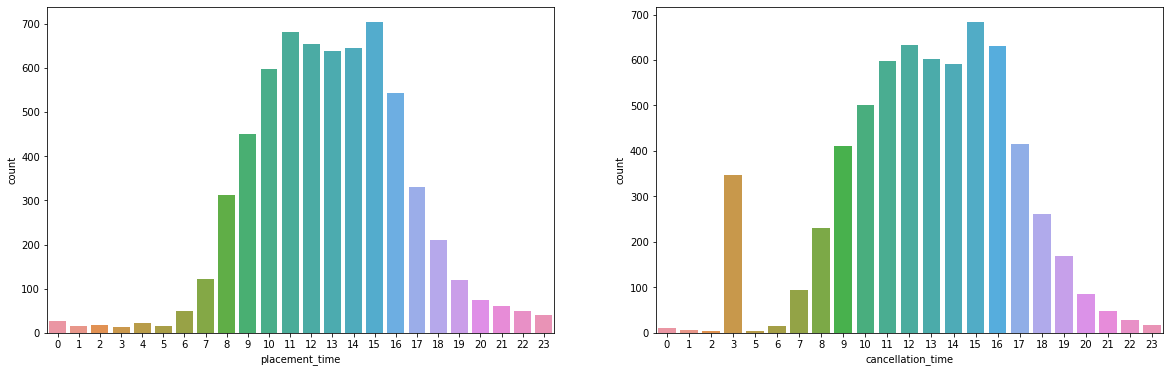

In [ ]:
#Plotting the count of placement_time and cancellation time
fig, ax = plt.subplots(1,2, figsize=(20, 6))
sns.countplot(df1['placement_time'], ax=ax[0])
sns.countplot(df1['cancellation_time'], ax=ax[1])

Most cancelled orders were placed at 1500 hrs followed by 1100 hrs. The placement time with the least cancelled orders was between 0000hrs and 0700hrs.

Most cancelled orders were cancelled at 1500 hrs followed by 1600 hrs and 1200 hrs. The time with the least cancellation was between 2000hrs and 0700hrs. However at 0300 hrs there seems to be a lot of order cancellations.

#### iv.) Frequency table
The frequency tables will show the number of observation in variables with extremely low counts compared to others.

In [ ]:
#Plotting a frequency table for the vehicle type, platform and scheduled
print(df1['vehicle_type'].value_counts())
print("\n")
print(df1['platform'].value_counts())
print("\n")
print(df1['scheduled'].value_counts())

Bike             6385
Standard Bike       8
Name: vehicle_type, dtype: int64


android     2742
desktop     2382
ios          796
API          472
peer_web       1
Name: platform, dtype: int64


OnDemAND     6146
Scheduled     247
Name: scheduled, dtype: int64


Almost all of the cancelled orders were serviced by a bike with only 8 cancelled orders serviced by a Standard Bike.

A lot of cancelled orders were placed using an android followed by desktop, then ios, then API and finally peer_web with only 1 cancellation.

Most scheduled orders were cancelled and very few on demand orders were canceled.

#### v.) Pie Charts
The pie charts will create a better visualization of the above variables.

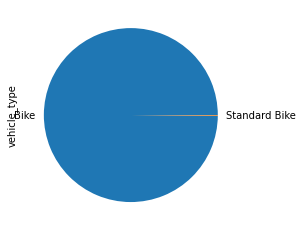

In [ ]:
#Plotting a piechart to show the proportion of the vehicle type thats serviced the order
df1['vehicle_type'].value_counts().plot.pie()

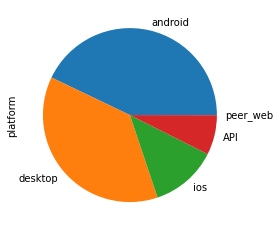

In [ ]:
#Plotting a piechart to show the proportion of the platform used to place an order
df1['platform'].value_counts().plot.pie()

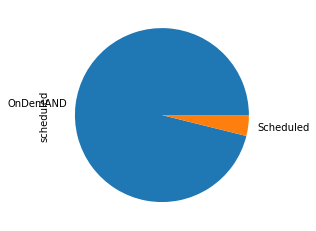

In [ ]:
#Plotting a piechart to show the proportion of schedule and ondemand orders
df1['scheduled'].value_counts().plot.pie()

#### vi.) Summary

The following is a summary of the above univariate analysis:
* The numerical variables possess a uniform distribution.
* The latitude variable contains a lot of negative values.
* The most common reason as to why orders were cancelled is because there was 'no driver allocated to my request' and the least popular reason is 'Delay'
* Most cancelled orders were business orders.
* Most cancelled orders were Express i.e. the orders sent one at a time.
* Most orders were cancelled by the customer.
* Most cancelled orders were placed on Friday with Sunday having the least amount of cancelled orders placed.
* Most cancelled orders were cancelled on Friday with Sunday being the day with the least cancellations.
* Most cancelled orders were placed at 1500 hrs and the least cancelled orders was between 0000hrs and 0700hrs.
* Most cancelled orders were cancelled at 1500 hrs. The time with the least cancellation was between 2000hrs and 0200hrs.
* Almost all of the cancelled orders were serviced by a bike.
* A lot of cancelled orders were placed using an andriod.
* Most cancelled orders were scheduled orders.

### b.) Bivariate Analysis

We'll perform bivariate analysis i.e. analysis of two variables in order to understand the relationship between the variables.

#### i.) Catplots
These will show the frequencies of the categories of the cancel reason variables e.g the frequency of the reasons for a cancellation order on a particular day.

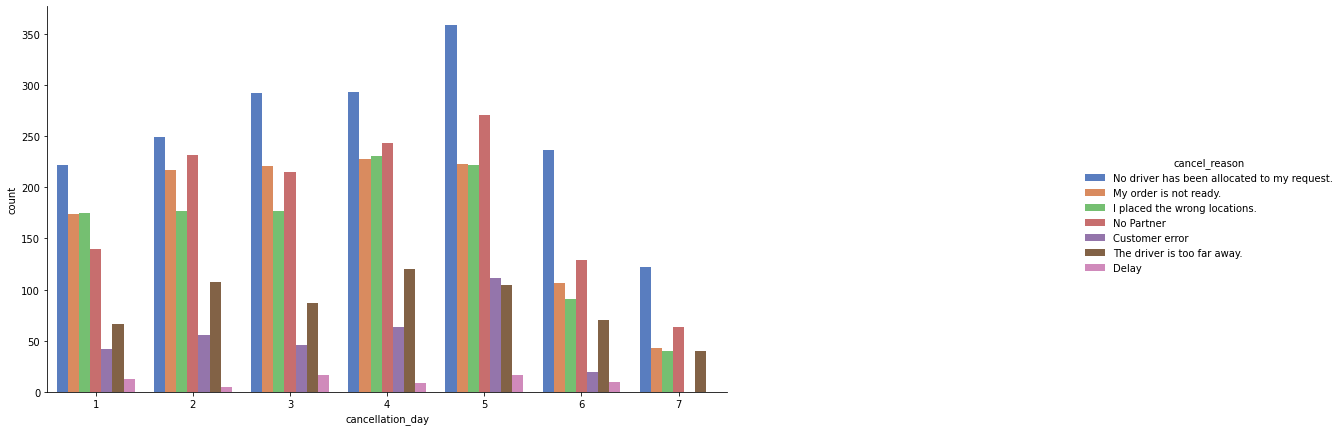

In [ ]:
#Plotting a catplot to understand the relationship between cancellation day and cancel reason
g = sns.catplot(x="cancellation_day", hue="cancel_reason", kind="count", palette="muted", data=df1)
g.fig.set_figwidth(20)
g.fig.set_figheight(6)

* From the Univariate analysis, most orders were cancelled on Day 5(Friday). This catplot shows that the most popular reason as to why orders were cancelled on Day5(Friday) is that 'No driver has been allocated to my request'. The second most popular reason is 'My order is not ready'.
* Day7(Sunday),with the least cancellations, still shows the most popular reason for cancellation is 'No driver has been allocated to my request'. 
* In as much as Delay is the least cited reason for cancellation, Day7(Sunday) has no delay but delay is a common reason during all the other days. It is however relatively low on Day2(Tuesday)
* Customer error is high on Fridays compared to other days.
* No partner is a common reason for cancellation on Friday compared to the other days.
* The driver is too far away is a higher reason for cancellation on Thursdays compared to other days.
* Customers place the wrong locations regardless of the day.


We'll create a column to show whether the order was cancelled the same day it was placed or not. We'll find the difference between the placement day and cancellation day and if the difference is 0 we'll allocate same day cancellation but if the difference is not 0 we'll allocate other day cancellation. This will help understand whether the cancel reasons were different on orders cancelledon the same day they were placed or other day cancellations.

In [ ]:
#Creating a day column to indicate the difference of cancellation day and placement day
df1['day'] = df1['cancellation_day'] - df1['placement_day']
print(df1['day'].unique())

[0 1 2 4 3 6 5 -1 -3 -4 -5 -6]


In [ ]:
#Defining a function that will allocate the delivery same day or other day
def order_delay(day):
    if day == 0:
        return 'Same Day'
    else:
        return 'Other Day'
#Calling the function
df1['cancelled'] = df1.day.apply(lambda i: order_delay(i))
df1.head(5)

,personal_or_business,vehicle_type,standard_or_express,platform,cancel_reason,cancelled_by,placement_day,placement_time,cancellation_day,cancellation_time,distance_(km),pickup_lat,pickup_long,scheduled,day,cancelled
0,Personal,Bike,Express,android,No driver has been allocated to my request.,Customer,1,17,1,17,9,-1.313053,36.841437,OnDemAND,0,Same Day
1,Personal,Bike,Express,android,My order is not ready.,Customer,1,12,1,12,14,-1.318959,36.853394,OnDemAND,0,Same Day
2,Business,Bike,Express,android,I placed the wrong locations.,Customer,1,13,1,13,16,-1.313854,36.706867,OnDemAND,0,Same Day
3,Personal,Bike,Express,android,My order is not ready.,Customer,1,10,1,10,20,-1.206197,36.778776,OnDemAND,0,Same Day
4,Personal,Bike,Standard,ios,No Partner,Staff,1,14,1,15,11,-1.296958,36.808166,OnDemAND,0,Same Day


In [ ]:
#Checking the number of observations of same day cancellation and other day cancellation using a frequency table
df1['cancelled'].value_counts()

Same Day     5943
Other Day     450
Name: cancelled, dtype: int64

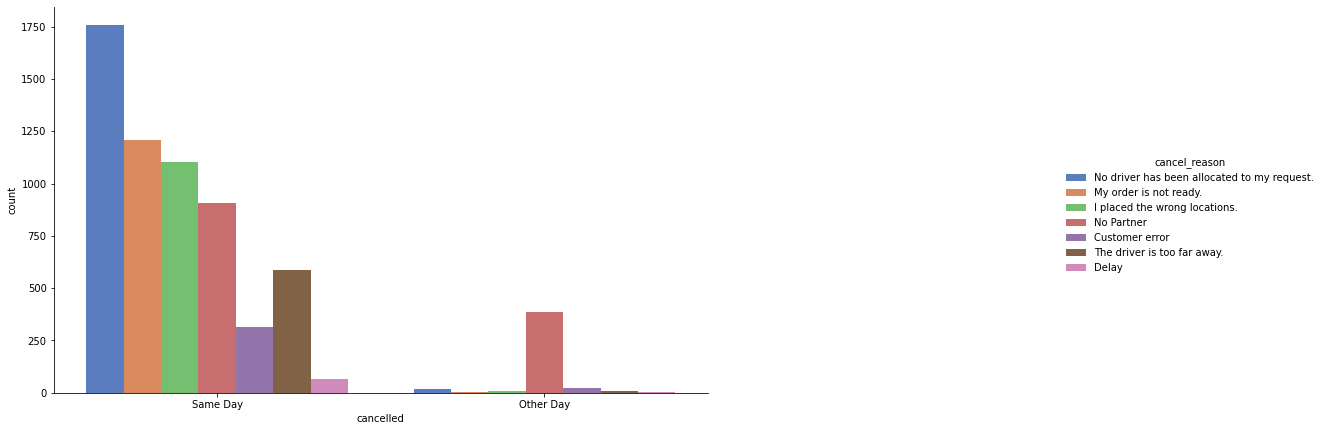

In [ ]:
#Plotting a catplot to understand the relationship between the same day or other day cancellation and the cancel reason.
g = sns.catplot(x="cancelled", hue="cancel_reason", kind="count", palette="muted", data=df1)
g.fig.set_figwidth(20)
g.fig.set_figheight(6)

* Most orders were cancelled on the same day as they were placed with very few orders cancelled a day or more after placement.
* The same day cancellations portray a similar pattern of cancel reasons i.e. the main reason for cancellation is no driver has been allocated to the request and the least reason being delay.
* The other day cancellations have a different pattern. Here, orders were cancelled because there was no partner. However customer error is a common reason for cancellation unlike the same day cancellations where it was a not so common reason. 

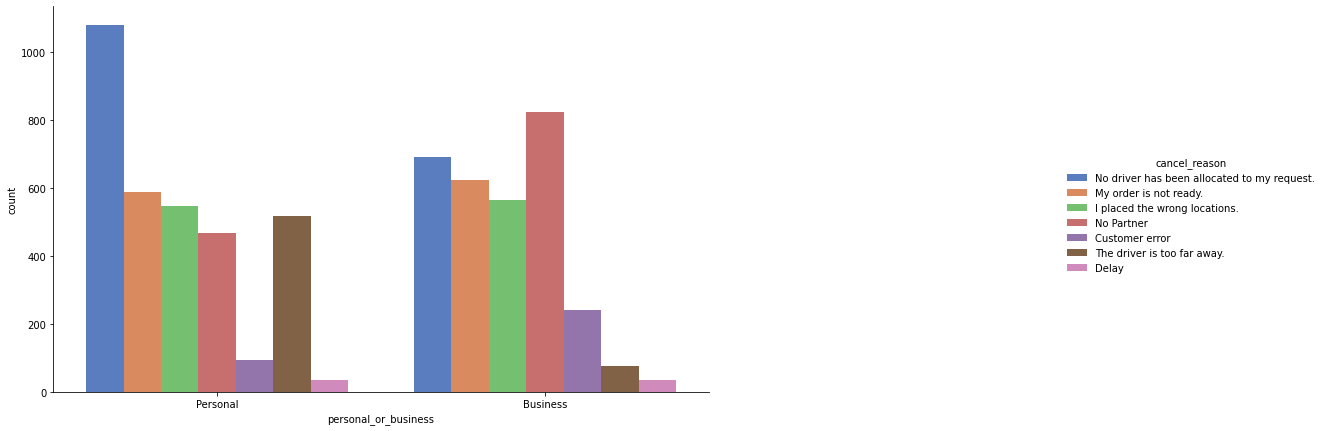

In [ ]:
#Plotting a catplot to understand the relationship between the type of business and cancel reason
g = sns.catplot(x="personal_or_business", hue="cancel_reason", kind="count", palette="muted", data=df1)
g.fig.set_figwidth(20)
g.fig.set_figheight(6)

* The main reason for order cancellation for personal orders is the common reason i.e. No driver has been allocated to my request.
* However, the orders that were businesses portray a different reason. The most common reason being No Partner.
* The driver is too far away is also a common reason for personal compared to business orders.
* Delay remains to be the least common reason for cancellation for both personal and business orders.

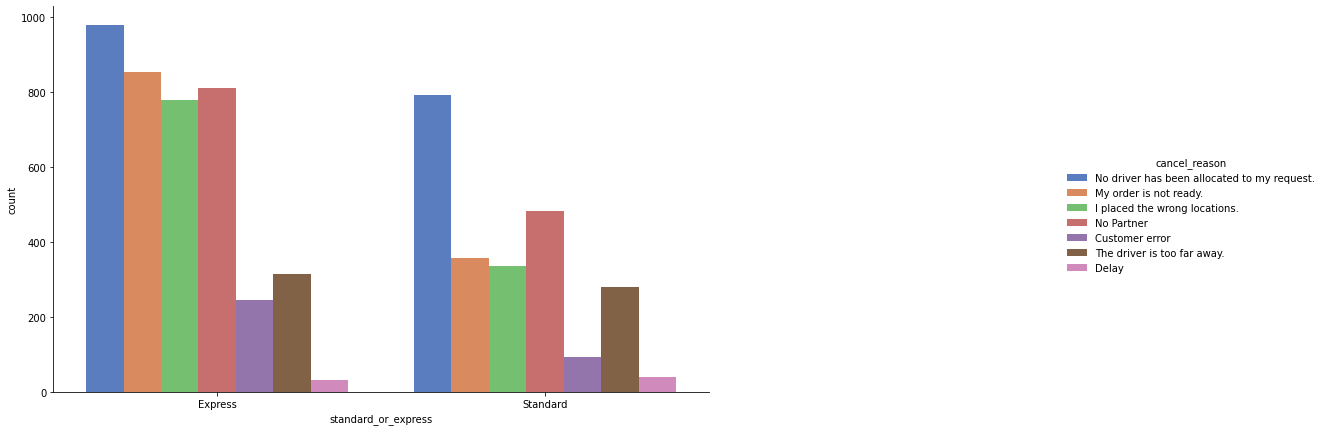

In [ ]:
#Plotting a catplot to understand the relationship between the type of order and cancel reason
g = sns.catplot(x="standard_or_express", hue="cancel_reason", kind="count", palette="muted", data=df1)
g.fig.set_figwidth(20)
g.fig.set_figheight(6)

* The most common reason for both types of orders remains to be No driver has been allocated to my request and the least being delay.
* No partner is the second most common reason for Standard orders i.e. multiple orders dispatched together.
* My order is not ready is the second most common reason for cancellation on Express orders.
* Delay is still the least common reason for cancellation.

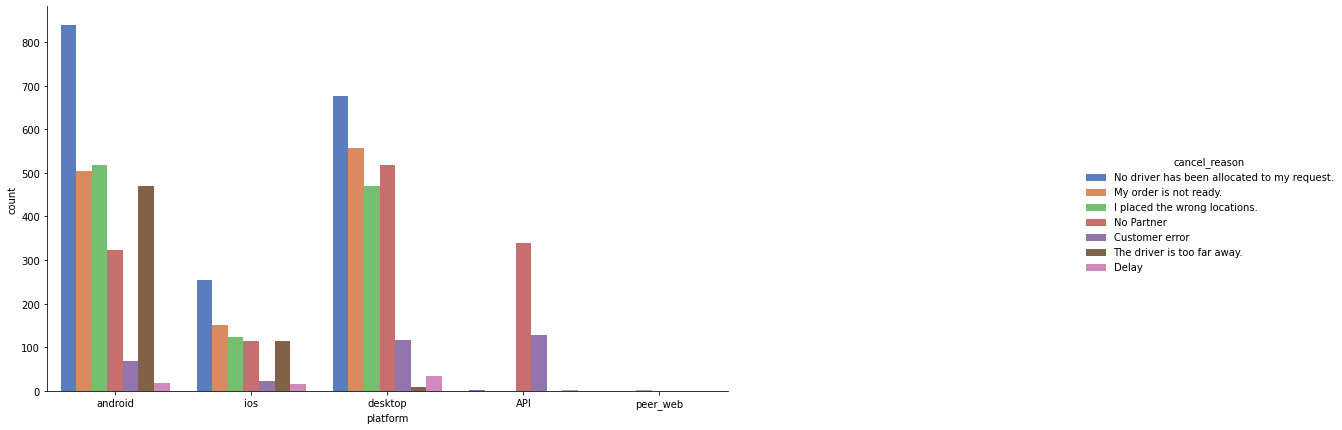

In [ ]:
#Plotting a catplot to understand the relationship between the platform that the order was placed and cancel reason
g = sns.catplot(x="platform", hue="cancel_reason", kind="count", palette="muted", data=df1)
g.fig.set_figwidth(20)
g.fig.set_figheight(6)

* For orders placed on android, ios and desktop platforms, the most common reason of cancellation is that No driver has been allocated to my request.
* Orders placed on API had a different reason for cancellation i.e. No Partner followed by Customer error as the second most common reasons. The other reasons were few or non-existent.
* Orders placed on the desktop platform also had very few citing The driver is too far away as their reason for cancellation.
* There was only 1 order cancellation that was placed on peer web and the reason was I placed the wrong locations.
* Orders placed on Android had a lot of cancellations citing the driver was too far away compared to the other platforms. 

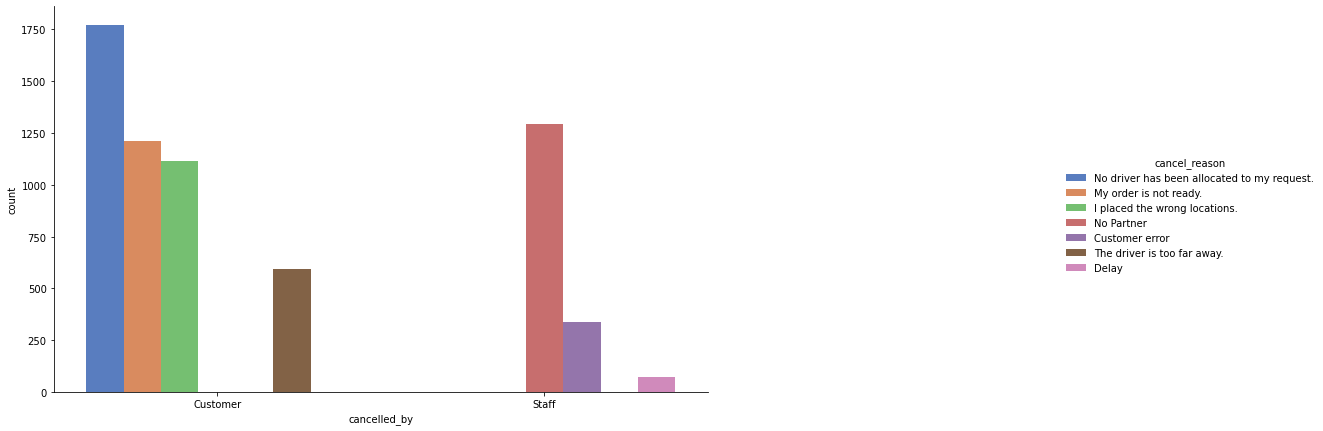

In [ ]:
#Plotting a catplot to understand the relationship between the person who cancelled the order and the cancel reason 
g = sns.catplot(x="cancelled_by", hue="cancel_reason", kind="count", palette="muted", data=df1)
g.fig.set_figwidth(20)
g.fig.set_figheight(6)

* Orders cancelled by a customer had No driver allocated to my request as the most common reason for cancellation.
* Orders cancelled by a customer did not have the following reasons for cancellation; No partner, Customer error and Delay.
* Orders cancelled by staff had No Partner as the most common reason for cancellation followed by Customer error and finally delay.

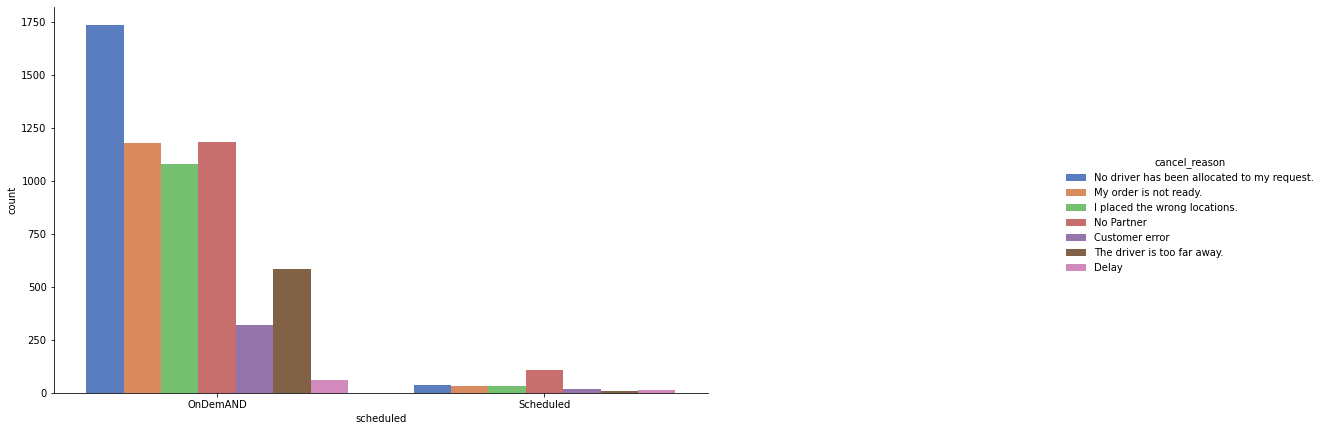

In [ ]:
#Plotting a catplot to understand the relationship between scheduled or demand orders and cancel reason
g = sns.catplot(x="scheduled", hue="cancel_reason", kind="count", palette="muted", data=df1)
g.fig.set_figwidth(20)
g.fig.set_figheight(6)

* Most onDemand orders were cancelled because No driver had been allocated to my order.
* Scheduled orders were the least cancelled and the main reason for cancellation was no partner.

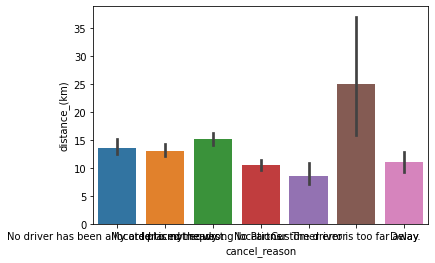

In [ ]:
#Plotting barplots to show the relationship between distance of the order from pick up to destination and the cancel reason
sns.barplot(x= 'cancel_reason', y = 'distance_(km)', data = df1)
fig.show()

* Most orders with a huge distance between the pick up and destination of the order were cancelled because The driver is too far away.
* Delay as well is a more common reason when it  comes to distance as compared to other variables.
* I placed the wrong location is also a relatively common reason when it comes to distance.

#### ii.) Barplots
These will show the relationship between a continous variable and two discrete variables.

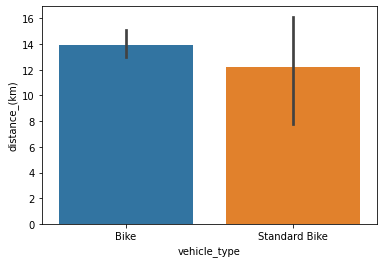

In [ ]:
#Plotting a barplot to see the relationship between distance and the vehicle types.
sns.barplot(x= 'vehicle_type', y = 'distance_(km)', data = df1)

In as much as the univariate analysis showed that there were only 8 standard bikes in the data, the distance travelled by the standard bikes is very high as opposed to the 6385 bikes.

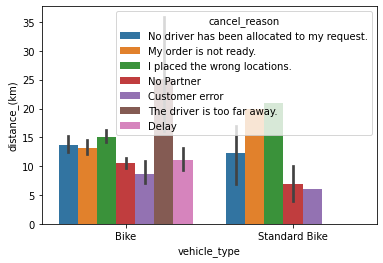

In [ ]:
#Plotting a staked barplot to show the relationship between the distance, the two bikes and reason for order cancellation
sns.barplot(x= 'vehicle_type', y = 'distance_(km)', data = df1, hue='cancel_reason')

* The bike's common cancellation reason is that the driver is too far away.
* The standard bike's common cancellation reason is wrong locations. The driver being far is still a reason but not as much as the other variables.
* Delay is a common reason for cancellation when using the bike.
* Delay is not a reason for cancellation when the standard bike is used.

#### iii.) Correlation
This will show the association of the random numeric variables

In [ ]:
#Checking how our varibales are correlated using a matrix
corrMatrix = df1.corr()
corrMatrix

,distance_(km),pickup_lat,pickup_long
distance_(km),1.000000,0.032725,-0.014479
pickup_lat,0.032725,1.000000,-0.626917
pickup_long,-0.014479,-0.626917,1.000000


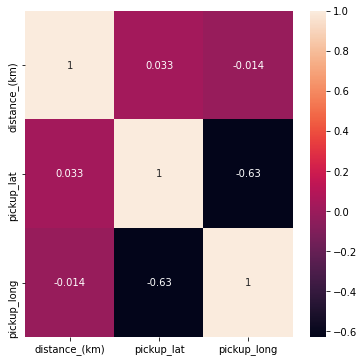

In [ ]:
#Plotting visualization of the correlation matrix for better clarity 
plt.figure(figsize=(6, 6))  
sns.heatmap(corrMatrix, annot = True)

The distance in km of the order from pick up to destination is weakly correlated to the pickup latitude and longitude. However, the pickup latitude and longitude are strongly correlated.

## 7. Data Modelling

This section entails building a model that uses the existing dataset to predict the cancellation reason for all orders with missing data in the second dataset.

We'll model the data using K-Nearest Neighbours machine learning algorithm.

Since this is a multiclass classification, K-Nearest Neighbours algorithm is capable of performing the multiclass classification as it does not require any specific assumptions. It also works on all kinds of data on which the classification is to be performed. 

The following steps were performed in order to predict the missing cancellation reasons:
* Encoding of categorical features
* Baseline model
* Actual model
* Model Optimization
* Evaluation
* Prediction of the missing cancellation reasons.

### a.) Encoding of categorical features.

Most of the features are categorical and are of object data type, we'll encode them using the Label Encoder before analysing them.

In [ ]:
#Dropping the new columns created for analysis
df1 = df1.drop(['day', 'cancelled'], axis = 1)
# Categorical boolean mask
categorical_feature_mask = df1.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df1.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df1[categorical_cols] = df1[categorical_cols].apply(lambda col: le.fit_transform(col))
df1[categorical_cols].head(10)

,personal_or_business,vehicle_type,standard_or_express,platform,cancel_reason,cancelled_by,placement_day,placement_time,cancellation_day,cancellation_time,scheduled
0,1,0,0,1,5,0,0,17,0,16,0
1,1,0,0,1,3,0,0,12,0,11,0
2,0,0,0,1,2,0,0,13,0,12,0
3,1,0,0,1,3,0,0,10,0,9,0
4,1,0,1,3,4,1,0,14,0,14,0
5,1,0,0,3,0,1,0,7,0,7,0
6,1,0,1,1,5,0,0,10,0,9,0
7,1,0,1,2,5,0,0,16,1,6,1
8,1,0,0,1,5,0,0,18,0,17,0
9,0,0,0,2,5,0,0,16,0,15,0


The categorical columns in the dataset have been encoded as follows;
* Personal_or_business: 0 for Business and 1 for Personal.
* Vehicle_type: 0 for Bike and 1 for Standard Bike.
* Standard_or_express: 0 for Express and 1 for Standard.
* Platform: 0 for API, 1 foe Android, 2 for desktop, 3 for IOS and 4 for peer web.
* Cancelleed_by: 0 for customer and 1 for staff.
* Placement_day and Cancellation_day: 0 for Day 1(Monday), 2 for Day2(Tuesday), 3 for Wednesday, 4 for Thursday, 5 for Friday, 6 for Saturday and 7 for Sunday.
* Scheduled: 0 for Ondemand and 1 for scheduled.
* Cancel Reason: 
    * 0 for Customer error
    * 1 for The driver is too far away.
    * 2 for I placed the wrong locations.
    * 3 for My order is not ready.
    * 4 for No Partner
    * 5 for No driver has been allocated to my request.
    * 6 for Delay

### b.) Baseline Model

We'll build a baseline model which will be a benchmark for our other models and we'll use it's accuracy score to determine if our models perform better or not.

The data in this model is not scaled and is fitted to the model as it is.

In [ ]:
#Importing the required libraries for the KNN model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#Splitting the independent and dependent variables i.e. the cancel reason is the  dependent variable
test_features = df1.columns.to_list()
test_features.remove('cancel_reason')

X = df1[test_features].values
y = df1['cancel_reason'].values

#Training using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [ ]:
#Training the model by fitting the train test with KNN classifier
 
#Setting the value of K at 5 at first.
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Predicting the test predictors
predicted = classifier.predict(X_test)

In [ ]:
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.3915537017726799

The baseline model gives an accuracy of 39%. This accuracy will be a benchmark to see if the model improves or not.

### c.) Building the Model

We'll now perform feature selection and build a model with the selected features.

#### i.) Feature Selection
We'll perform feature selection using selectKBest. Feature selection is a technique where we choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable.

In [ ]:
#Import SelectKBest, chi2(score function for classification)
from sklearn.feature_selection import SelectKBest, chi2

#Dropping the pickup latitude column as it contained negative values and will impact the model performance
df1 = df1.drop(['pickup_lat'], axis = 1)

#Splitting the independent and dependent variables
test_features = df1.columns.to_list()
test_features.remove('cancel_reason')

X = df1[test_features]
y = df1['cancel_reason']

#Create the object for SelectKBest and fit and transform the classification data
#k is the number of features we want to select, here it's 6
X_new=SelectKBest(score_func=chi2,k=6).fit_transform(X,y)

#Check the newly created variable for top 6 best features
print(X_new[:10])

[[ 1.  1.  0. 16.  9.  0.]
 [ 1.  1.  0. 11. 14.  0.]
 [ 0.  1.  0. 12. 16.  0.]
 [ 1.  1.  0.  9. 20.  0.]
 [ 1.  3.  1. 14. 11.  0.]
 [ 1.  3.  1.  7.  7.  0.]
 [ 1.  1.  0.  9. 16.  0.]
 [ 1.  2.  0.  6. 21.  1.]
 [ 1.  1.  0. 17. 10.  0.]
 [ 0.  2.  0. 15. 11.  0.]]


The best 6 features selected are personal_or_business, platform, cancelled_by, cancellation_time, distance_(km) and scheduled.

These are the features we'll use to build the model.

In [ ]:
#Splitting the independent and dependent variables i.e. the cancel reason is the  dependent variable
test_features = df1.columns.to_list()
test_features.remove('cancel_reason')

X = df1[['personal_or_business','platform','cancelled_by','cancellation_time','distance_(km)','cancellation_day']].values
y = df1['cancel_reason'].values

#Training using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [ ]:
#Feature Scaling
#Before making any actual predictions, we'll scale the features so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Training the model by fitting the train test with KNN classifier
 
#Setting the value of K at 5 at first.
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Predicting our test predictors
predicted = classifier.predict(X_test)

In [ ]:
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.4556830031282586

Using selected features, the accuracy score improves to 45% from 37%. This a better model than the baseline model. However, model optimization is required in order to obtain the best parameters for modelling.

#### ii.) Model Optimization
Here, we'll perform hyperparameter tuning using grid search in order to obtain the best parameters for the model.

In [ ]:
#Import GridsearchCv from sklearn
from sklearn.model_selection import GridSearchCV

#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 21


From the GridSearch, it can be seen that the best number of leaf_size is 1 while the optimal distance is p = 1,  the most optimal number of K is 21.

Using the selected features, we'll now use these optimal parameters to build a model.

In [ ]:
#Splitting the independent and dependent variables i.e. the cancel reason is the  dependent variable
test_features = df1.columns.to_list()
test_features.remove('cancel_reason')

X = df1[['personal_or_business','platform','cancelled_by','cancellation_time','distance_(km)','cancellation_day']].values
y = df1['cancel_reason'].values

#Training using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [ ]:
#Feature Scaling
#Before making any actual predictions, we'll scale the features so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Training our model by fitting the train test with KNN classifier
 
#We'll set the value of K at 21, leaf size at 1 and p at 1
classifier = KNeighborsClassifier(n_neighbors=21, leaf_size=1, p=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=1,
                     weights='uniform')

In [ ]:
#Predicting our test predictors
predicted = classifier.predict(X_test)

In [ ]:
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.4781021897810219

Performing hyperparameter tuning improves the model performance and gives an accuracy of 47%.

However, the accuracy is not as good, we'll use this parameters to build a model with all other features and not just the selected features.

In [ ]:
#Splitting the independent and dependent variables i.e. the cancel reason is the  dependent variable
test_features = df1.columns.to_list()
test_features.remove('cancel_reason')

X = df1[test_features].values
y = df1['cancel_reason'].values

#Training using 70% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

In [ ]:
#Feature Scaling
#Before making any actual predictions, we'll scale the features so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Training our model by fitting the train test with KNN classifier
 
#We'll set the value of K at 21, leaf size at 1 and p at 1
classifier = KNeighborsClassifier(n_neighbors=21, leaf_size=1, p=1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=1,
                     weights='uniform')

In [ ]:
#Predicting our test predictors
predicted = classifier.predict(X_test)

In [ ]:
#Evaluating our model using the accuracy score
accuracy_score(y_test, predicted)

0.5015641293013556

The accuracy score improves to 50%. This is a better accuaracy than the model with the selected features and the baseline model.

We'll use this model to make predictions of the missing cancel reason in the second dataset.

### d.) Making predictions

The dataset with missing cancellation reason will now be fitted to the final model in order to predict the cancellation reason for all
orders.

First, the categorical variables needs to be encoded before making predictions.

In [ ]:
#We'll encode the missing cancel reason dataset

#Dropping the dependent variable which contains missing values
df2 = df2.drop(['cancel_reason'], axis = 1)
# Categorical boolean mask
categorical_feature_mask = df2.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df2.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df2[categorical_cols] = df2[categorical_cols].apply(lambda col: le.fit_transform(col))
df2[categorical_cols].head(10)

,personal_or_business,vehicle_type,standard_or_express,platform,cancelled_by,placement_day,placement_time,cancellation_day,cancellation_time,scheduled
0,1,0,0,3,0,0,10,0,10,0
1,0,0,0,2,1,0,9,0,8,0
2,0,0,0,2,0,0,10,0,9,0
3,1,0,1,1,0,0,8,0,7,0
4,1,0,1,1,1,0,8,0,11,1
5,1,0,0,1,0,0,12,0,13,0
6,1,0,1,1,0,0,5,0,5,0
7,0,0,0,2,0,0,6,0,5,0
8,1,0,1,3,0,0,11,0,10,1
9,1,0,0,3,0,0,5,0,5,0


In [ ]:
#Now predicting the missing cancel reasons using the model built
ytest_pred = classifier.predict(df2)
ytest_pred

array([5, 2, 5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 2, 5, 5, 5,
       5, 5, 3, 4, 5, 5, 2, 5, 5, 5, 5, 2, 5, 4, 5, 5, 5, 3, 5, 3, 5, 5,
       2, 5, 2, 5, 3, 3, 2, 5, 5, 5, 5, 5, 5, 5, 2, 4, 4, 3, 5, 5, 3, 4,
       5, 4, 4, 5, 2, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 3, 5, 5,
       5, 5, 5, 5, 3, 4, 4, 5, 4, 4, 5, 4, 5, 4, 4, 4, 5, 4, 4, 4, 2, 4,
       5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 2, 5, 5, 5, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [ ]:
#Storing the new column under cancel reason in the dataset
df2['cancel_reason'] = pd.Series(ytest_pred, index=df2.index)

#Previewing the dataset
df2.head()

,personal_or_business,vehicle_type,standard_or_express,platform,cancelled_by,placement_day,placement_time,cancellation_day,cancellation_time,distance_(km),pickup_lat,pickup_long,scheduled,cancel_reason
0,1,0,0,3,0,0,10,0,10,4,-1.299370,36.822107,0,5
1,0,0,0,2,1,0,9,0,8,17,-1.264490,36.789303,0,2
2,0,0,0,2,0,0,10,0,9,18,-1.427056,36.961499,0,5
3,1,0,1,1,0,0,8,0,7,8,-1.301737,36.743936,0,5
4,1,0,1,1,1,0,8,0,11,13,-1.308098,36.920464,1,3


Since all the categorical values are encoded, we'll do reverse encoding and replace them with their actual values.

In [ ]:
#Replacing the encoded categorical values with their actual values.
df2["personal_or_business"].replace({0: "Business", 1: "Personal"}, inplace=True)
df2["vehicle_type"].replace({0: "Bike", 1: "Standard Bike"}, inplace=True)
df2["standard_or_express"].replace({0: "Express", 1: "Standard"}, inplace=True)
df2["platform"].replace({0: "API", 1: "android", 2: "desktop", 3: "ios", 4: "peer_web"}, inplace=True)
df2["cancelled_by"].replace({0: "Customer", 1: "Staff"}, inplace=True)
df2["placement_day"].replace({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5, 5 : 6, 6 : 7}, inplace=True)
df2["cancellation_day"].replace({0 : 1, 1 : 2, 2 : 3, 3 : 4, 4 : 5, 5 : 6, 6 : 7}, inplace=True)
df2["scheduled"].replace({0: "OnDemAND", 1: "Scheduled"}, inplace=True)
df2["cancel_reason"].replace({0 : "Customer error", 1 : "The driver is too far away.", 2 : "I placed the wrong locations.", 3 : "My order is not ready.", 4 : "No Partner", 5 : "No driver has been allocated to my request.", 6 : "Delay"}, inplace=True)

#Previewing the top 5 records of the dataset
df2.head()

,personal_or_business,vehicle_type,standard_or_express,platform,cancelled_by,placement_day,placement_time,cancellation_day,cancellation_time,distance_(km),pickup_lat,pickup_long,scheduled,cancel_reason
0,Personal,Bike,Express,ios,Customer,1,10,1,10,4,-1.299370,36.822107,OnDemAND,No driver has been allocated to my request.
1,Business,Bike,Express,desktop,Staff,1,9,1,8,17,-1.264490,36.789303,OnDemAND,I placed the wrong locations.
2,Business,Bike,Express,desktop,Customer,1,10,1,9,18,-1.427056,36.961499,OnDemAND,No driver has been allocated to my request.
3,Personal,Bike,Standard,android,Customer,1,8,1,7,8,-1.301737,36.743936,OnDemAND,No driver has been allocated to my request.
4,Personal,Bike,Standard,android,Staff,1,8,1,11,13,-1.308098,36.920464,Scheduled,My order is not ready.


The dataset above is now complete with predictions of the missing cancel reason.

## 8. Challenging the Solution

The K-Nearest Neighbours model did not perform so well i.e. regardless of optimization, the model's accuracy did not increase significantly.

Therefore, we'll build a model with Gradient Boosting to see if it has a better accuracy score.

In [ ]:
#Importing GrandientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
#Splitting the independent and dependent variables i.e. the cancel reason is the  dependent variable
test_features = df1.columns.to_list()
test_features.remove('cancel_reason')

X = df1[test_features].values
y = df1['cancel_reason'].values
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#Feature Scaling
#Before making any actual predictions, we'll scale the features so that all of them can be uniformly evaluated.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train the model on the training set.
gbr = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=2)
gbr = gbr.fit(X_train, y_train)

y_pred_gbr = gbr.predict(X_test)

In [ ]:
#Evaluating our model using the accuracy score
accuracy_score(y_test, y_pred_gbr)

0.5207193119624707

The Gradient Boosted model has 52% accuarcy which is only 2% more compared to the KNN model. In as much as this is a better model, it is not such a huge improvement. We'll therefore settle on the KNN model.

## 9. Recommendations

The following are the recommendations on how to reduce the number of cancelled orders:
* Increase the number of drivers or allocate drivers to orders imeediately as the most common reason for cancellation was that No driver had been allocated to the order.
* Increase the number of partners for Business orders and standard orders  i.e. waiting for multiple orders and then dispatching them together will result to less cancellations as many of these orders were cancelled because there was no partner.
* Staff should check for customer errors on orders made on API as this was the platform with customer errors as the most cancellation reason.
* Advice customers to schedule orders as scheduled orders have the least cancellations.
* Standard bikes should be used to dispatch orders with a huge distance between the pickup and destination. Incase the bikes are used, the driver should be dispatched early.
* Increase the number of standard bikes dispatching orders as they are prone to very few order cancellations.
* Customers place wrong locations regardless, therefore, Sendy platforms should provide a way of customers to confirm their locations before requesting for a Partner/driver.
* Increasing the number of drivers and partners on Friday as there are so many order cancellations on this day compared to other days.

## 10. Follow up Questions

### a.) Did we have the right data?
Yes, we had the right data for the analysis.

### b). Do we need other data to answer our question?
Yes, a huge dataset would have been ideal when training the model for predictions.

### c). Did we have the right question?
Yes, we had the right question.